#**Assignment 2**

In [53]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import math as m
import random

#**Continuous Distributions**

In [48]:
def fact(f):
  fact=1
  if f==0:
    return 1
  else:
    for i in range(1,f+1):
      fact=fact*i
    return fact
  
#Functions for pdf plot
def unif_pdf(t,a,b):
    return (1/(b-a))*(t<=b)-(1/(b-a))*(t<a)

def exp_pdf(t,lam):
  return lam*np.exp(-lam*t)*(t>0)

def gamma_pdf(t,a,b):
  return (pow(t,a)*np.exp(-t/b)/(fact(a)*pow(b,a+1)))*(t>0)

def beta(i,j):
  return fact(i+j-1)/(fact(i-1)*fact(j-1))

def beta_pdf(t,i,j):
  return (beta(i,j)*pow(t,i-1)*pow(1-t,j-1))*(t>0)*(t<1)

def gaussian_pdf(t,mu,sigma):
  return (np.exp(-((t-mu)**2)/(2*sigma**2))/(np.sqrt(2*np.pi*sigma**2)))

def chisq_pdf(t,k):
  return (pow(t,(k/2)-1)*np.exp(-t/2)/(pow(2,k/2)*fact(int(k/2-1))))

def mean_pdf(t,x):
  return round(np.sum(t*x)*(t[1]-t[0]),2)

def variance_pdf(t,x):
  return round((t[1]-t[0])*np.sum(x*(t-mean_pdf(t,x))**2),2)

def median(t,x):
  return t[np.where(abs(x-0.5)==np.min(abs(x-0.5)))]

def mode(t,x):
  return round(t[np.argmax(x)],2)

In [42]:
#Functions for cdf plot
def unif_cdf(t,a,b):
  if b>a:
    return ((t-a)/(b-a))*(t>=a)*(t<=b)+1*(t>b)

def exp_cdf(t,lam):
  return (1-np.exp(-lam*t))*(t>0)

def gamma_cdf(t,a,b):
  L=len(t)
  z=np.zeros(L)
  for i in range(L):
    for k in range(i):
      z[i]+=(t[k+1]-t[k])*gamma_pdf(t[k],a,b)
  return z

def beta_cdf(t,a,b):
  L=len(t)
  z=np.zeros(L)
  for i in range(L):
    for k in range(i):
      z[i]+=(t[k+1]-t[k])*beta_pdf(t[k],a,b)
  return z

def gaussian_cdf(t,a,b):
  L=len(t)
  z=np.zeros(L)
  for i in range(L):
    for k in range(i):
      z[i]+=(t[k+1]-t[k])*gaussian_pdf(t[k],a,b)
  return z

def chisq_cdf(t,k):
  L=len(t)
  z=np.zeros(L)
  for i in range(1,L):
    for j in range(i):
      z[i]+=(t[1]-t[0])*chisq_pdf(t[j],k)
  return z

#Uniform distribution

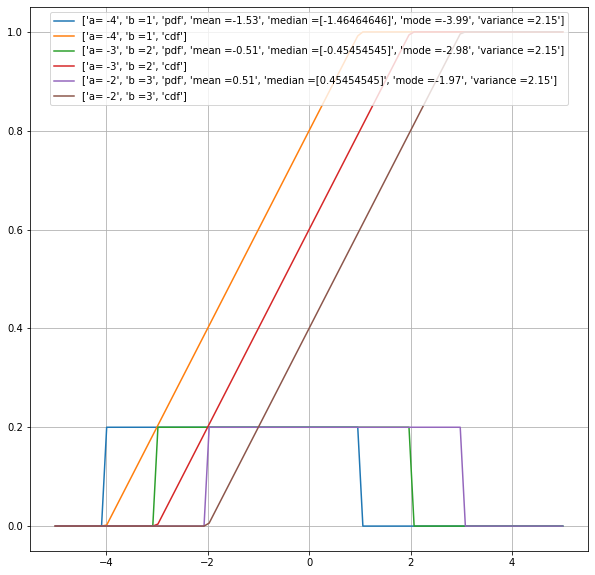

In [32]:
t=np.linspace(-5,5,100)
a = [-4,-3,-2]
b = [1,2,3]
list_=[]
plt.figure(1,figsize=(10,10))
for i in range(3):
  plt.plot(t,unif_pdf(t,a[i],b[i]))
  plt.plot(t,unif_cdf(t,a[i],b[i]))
  list_.append(["a= "+str(a[i]),"b ="+str(b[i]),"pdf","mean ="+str(mean_pdf(t,unif_pdf(t,a[i],b[i]))),"median ="+str(median(t,unif_cdf(t,a[i],b[i]))),"mode ="+str(mode(t,unif_pdf(t,a[i],b[i]))),"variance ="+str(variance_pdf(t,unif_pdf(t,a[i],b[i])))])
  list_.append(["a= "+str(a[i]),"b ="+str(b[i]),"cdf"])
  plt.grid(True)
plt.legend(list_,loc="upper center")

#Exponential distribution

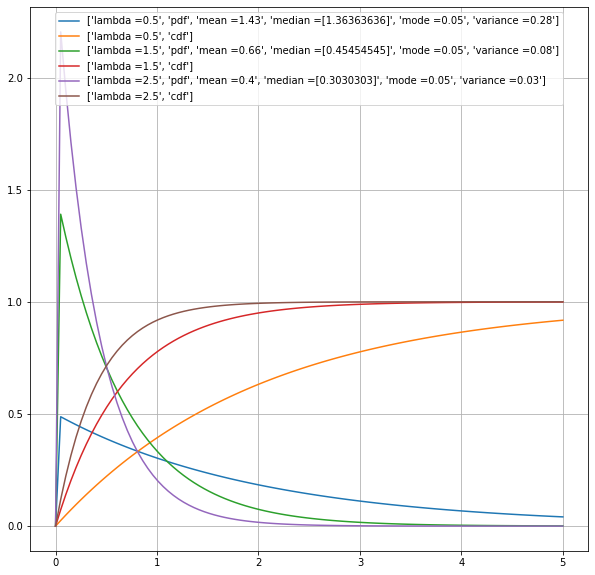

In [132]:
t=np.linspace(0,5,100)
lam=[0.5,1.5,2.5]
list_=[]
plt.figure(1,figsize=(10,10))
for i in range(3):
  plt.plot(t,exp_pdf(t,lam[i]))
  plt.plot(t,exp_cdf(t,lam[i]))
  list_.append(["lambda ="+str(lam[i]),"pdf","mean ="+str(mean_pdf(t,exp_pdf(t,lam[i]))),"median ="+str(median(t,exp_cdf(t,lam[i]))),"mode ="+str(mode(t,exp_pdf(t,lam[i]))),"variance ="+str(variance_pdf(t,exp_pdf(t,lam[i])))])
  list_.append(["lambda ="+str(lam[i]),"cdf"])
  plt.grid(True)
plt.legend(list_,loc="upper center")

#Gamma distribution

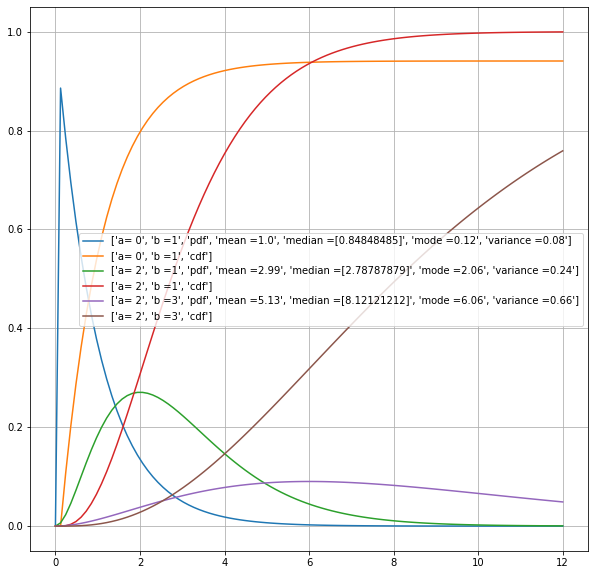

In [137]:
t=np.linspace(0,12,100)
a = [0,2,2]
b = [1,1,3]
list_=[]
plt.figure(1,figsize=(10,10))
for i in range(3):
  plt.plot(t,gamma_pdf(t,a[i],b[i]))
  plt.plot(t,gamma_cdf(t,a[i],b[i]))
  list_.append(["a= "+str(a[i]),"b ="+str(b[i]),"pdf","mean ="+str(mean_pdf(t,gamma_pdf(t,a[i],b[i]))),"median ="+str(median(t,gamma_cdf(t,a[i],b[i]))),"mode ="+str(mode(t,gamma_pdf(t,a[i],b[i]))),"variance ="+str(variance_pdf(t,gamma_pdf(t,a[i],b[i])))])
  list_.append(["a= "+str(a[i]),"b ="+str(b[i]),"cdf"])
  plt.grid(True)
plt.legend(list_,loc="center right")

#Beta distribution

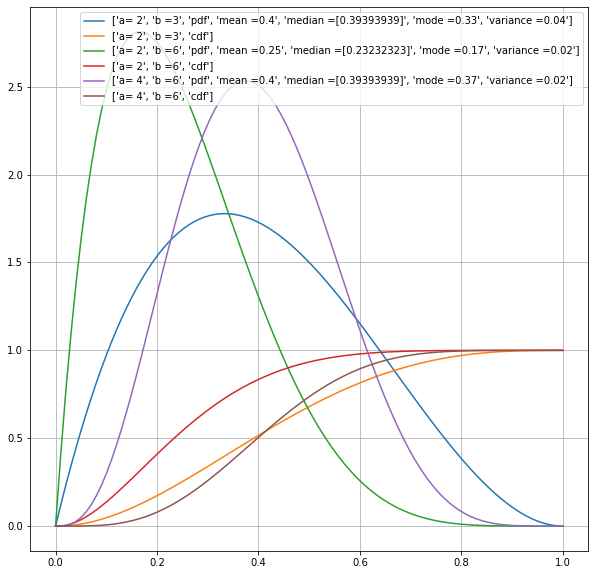

In [141]:
t=np.linspace(0,1,100)
a = [2,2,4]
b = [3,6,6]
list_=[]
plt.figure(1,figsize=(10,10))
for i in range(3):
  plt.plot(t,beta_pdf(t,a[i],b[i]))
  plt.plot(t,beta_cdf(t,a[i],b[i]))
  list_.append(["a= "+str(a[i]),"b ="+str(b[i]),"pdf","mean ="+str(mean_pdf(t,beta_pdf(t,a[i],b[i]))),"median ="+str(median(t,beta_cdf(t,a[i],b[i]))),"mode ="+str(mode(t,beta_pdf(t,a[i],b[i]))),"variance ="+str(variance_pdf(t,beta_pdf(t,a[i],b[i])))])
  list_.append(["a= "+str(a[i]),"b ="+str(b[i]),"cdf"])
  plt.grid(True)
plt.legend(list_,loc="upper right")

#Gaussian distribution

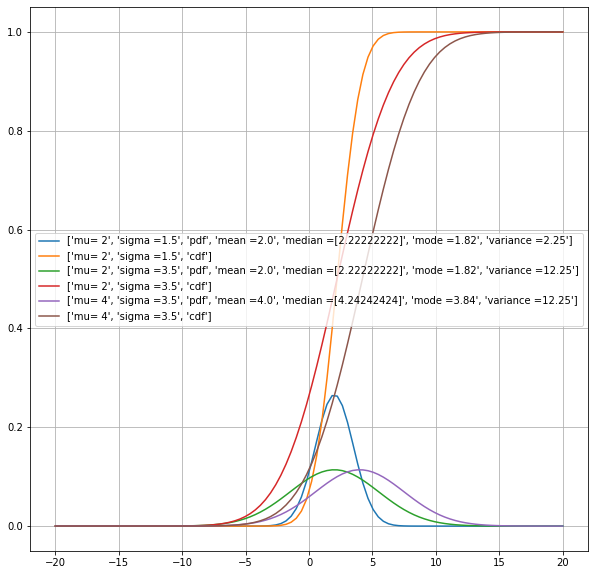

In [33]:
t=np.linspace(-20,20,100)
a = [2,2,4]
b = [1.5,3.5,3.5]
list_=[]
plt.figure(1,figsize=(10,10))
for i in range(3):
  plt.plot(t,gaussian_pdf(t,a[i],b[i]))
  plt.plot(t,gaussian_cdf(t,a[i],b[i]))
  list_.append(["mu= "+str(a[i]),"sigma ="+str(b[i]),"pdf","mean ="+str(mean_pdf(t,gaussian_pdf(t,a[i],b[i]))),"median ="+str(median(t,gaussian_cdf(t,a[i],b[i]))),"mode ="+str(mode(t,gaussian_pdf(t,a[i],b[i]))),"variance ="+str(variance_pdf(t,gaussian_pdf(t,a[i],b[i])))])
  list_.append(["mu= "+str(a[i]),"sigma ="+str(b[i]),"cdf"])
  plt.grid(True)
plt.legend(list_,loc="center left")

#Standard Normal Distribution

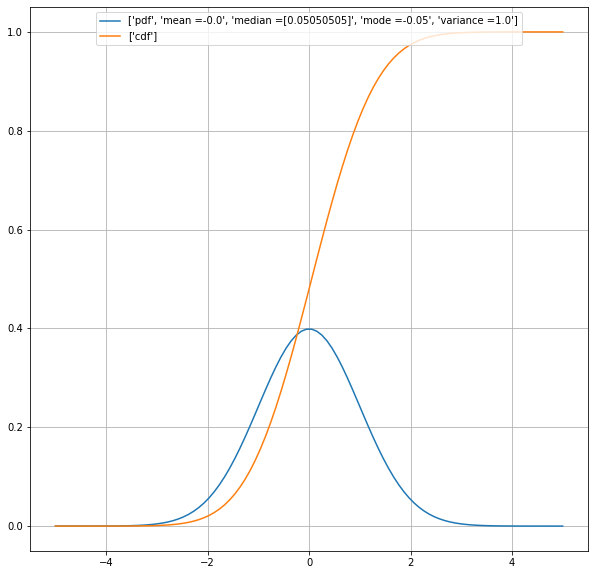

In [38]:
t=np.linspace(-5,5,100)
list_=[]
plt.figure(1,figsize=(10,10))
plt.plot(t,gaussian_pdf(t,0,1))
plt.plot(t,gaussian_cdf(t,0,1))
list_.append(["pdf","mean ="+str(mean_pdf(t,gaussian_pdf(t,0,1))),"median ="+str(median(t,gaussian_cdf(t,0,1))),"mode ="+str(mode(t,gaussian_pdf(t,0,1))),"variance ="+str(variance_pdf(t,gaussian_pdf(t,0,1)))])
list_.append(["cdf"])
plt.grid(True)
plt.legend(list_,loc="upper center")

#Chi-Squared distribution

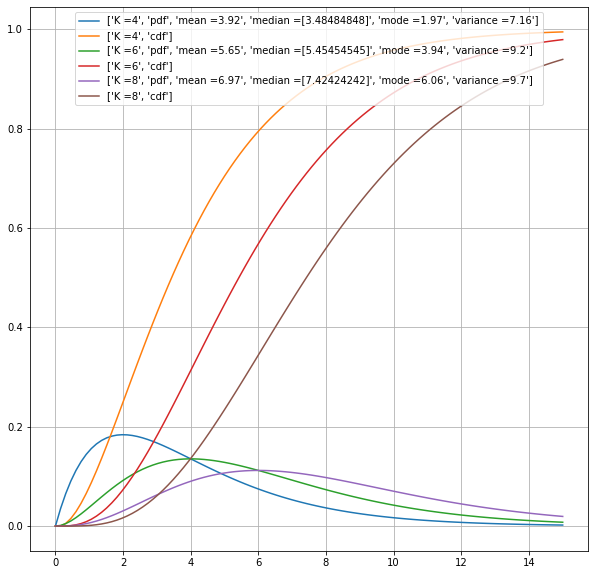

In [43]:
t=np.linspace(0,15,100)
k=[4,6,8]
list_=[]
plt.figure(1,figsize=(10,10))
for i in range(3):
  plt.plot(t,chisq_pdf(t,k[i]))
  plt.plot(t,chisq_cdf(t,k[i]))
  list_.append(["K ="+str(k[i]),"pdf","mean ="+str(mean_pdf(t,chisq_pdf(t,k[i]))),"median ="+str(median(t,chisq_cdf(t,k[i]))),"mode ="+str(mode(t,chisq_pdf(t,k[i]))),"variance ="+str(variance_pdf(t,chisq_pdf(t,k[i])))])
  list_.append(["K ="+str(k[i]),"cdf"])
  plt.grid(True)
plt.legend(list_,loc="upper center")

This is Rayleigh distribution


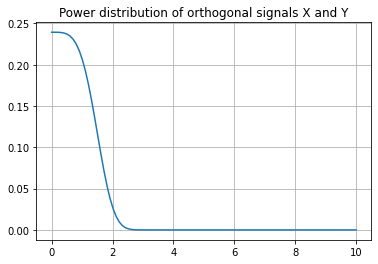

In [51]:
t=np.linspace(0,10,100)
plt.plot(t,gaussian_pdf(t**2,0,2)**2++gaussian_pdf(t**2,0,-2))
plt.title("Power distribution of orthogonal signals X and Y")
plt.grid(True)
print("This is Rayleigh distribution")

#**Discrete Distributions**

#Bernoulli distribution

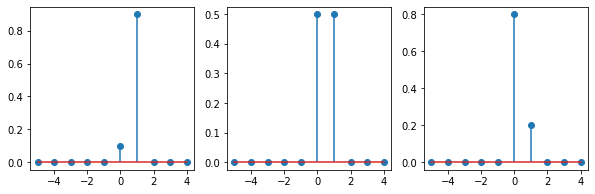

In [ ]:
def bernoulli(p,t):
  pmf=np.zeros(len(t))
  pmf[np.where(t==0)]=p
  pmf[np.where(t==1)]=1-p
  return pmf

p=[0.1,0.5,0.8]
t=np.arange(-5,5)
plt.figure(1,figsize=(10,3))
k=1
for i in p:
  plt.subplot(1,3,k)
  plt.stem(t,bernoulli(i,t),use_line_collection=True)
  k=k+1

The mean for p=0.1,0.5,0.8 are 0.9,0.5,0.2
and the variances are 0.09,0.25,0.16

#Binomial dstribution

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

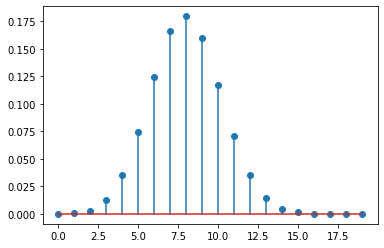

In [174]:
def binomial(t,p):
  pmf=np.zeros(len(t))
  for k in range(0,21):
    pmf[np.where(t==k)]=(fact(20)/(fact(20-k)*fact(k)))*(pow(p,k)*pow(1-p,20-k))
  return pmf

t=np.arange(0,20)
plt.stem(t,binomial(t,0.4))

The mean and variance for p=0.4 and n=20 are 8 and 4.8

#Geometric distribution

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

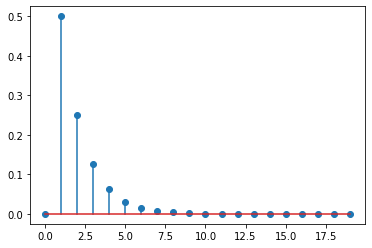

In [195]:
def geometric(t,p):
  pmf=np.zeros(len(t))
  for k in range(1,len(t)):
    pmf[np.where(t==k)]=p*pow(1-p,k-1)
  return pmf

t=np.arange(0,20)
plt.stem(t,geometric(t,0.5))

#Poisson distribution

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


<StemContainer object of 3 artists>

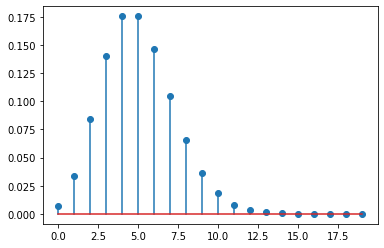

In [ ]:
def poisson(t,lam):
  pmf=np.zeros(len(t))
  for i in range(len(t)):
    pmf[np.where(t==i)]=(pow(lam,i)*np.exp(-lam))/(fact(i))
  return pmf
plt.stem(t,poisson(t,5),use_line_collection=True)

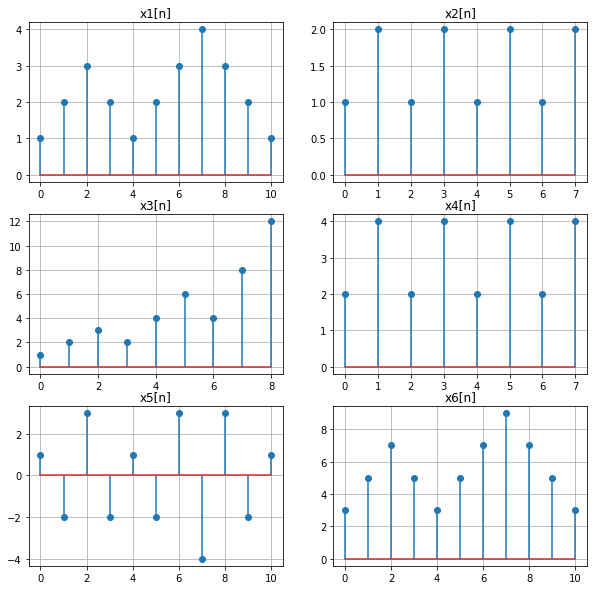

In [6]:
x=[]
x1=[1,2,3,2,1,2,3,4,3,2,1]
x.append(x1)
x2=[1,2,1,2,1,2,1,2]
x.append(x2)
x3=[1,2,3,2,4,6,4,8,12,]
x.append(x3)
x4=[2,4,2,4,2,4,2,4]
x.append(x4)
x5=[1,-2,3,-2,1,-2,3,-4,3,-2,1]
x.append(x5)
x6=np.zeros(len(x[0]))
for i in range(len(x[0])):
  x6[i]=2*x1[i]+1
x.append(x6)

plt.figure(1,figsize=(10,10))
for i in range(6):
  plt.subplot(3,2,i+1)
  plt.stem(x[i],use_line_collection=True)
  plt.title(f"x{i+1}[n]")
  plt.grid(True)

#Autocorrelation

In [17]:
def mean(x):
  return (np.sum(x)/len(x))
def sigma(x):
  mu=mean(x)
  return (np.sqrt(np.sum((x-mu)**2)/len(x)))
def autocorrelation(x,h):
  M=len(x)
  N=len(h)
  h=np.flip(h)
  y=np.zeros(M+N-1)
  sigma_x=sigma(x)
  sigma_h=sigma(h)
  for n in range(0,M+N-1):
    k=0
    while n-k>=0:
      if n-k<N and k<M:
        y[n]=y[n]+x[k]*h[n-k]
      k=k+1
  n=np.arange(-max(M-1,N-1),min(M,N))
  return n,(y/(sigma_x*sigma_h*len(y)))

Autocorrelation of x1 with a delay of 2 =  2.446091644204852
Power of x1 =  3.3701707097933515
Autocorrelation of x2 with a delay of 2 =  4.0
Power of x2 =  5.333333333333333
Autocorrelation of x3 with a delay of 2 =  0.7725090036014406
Power of x3 =  1.588235294117647
Autocorrelation of x4 with a delay of 2 =  4.0
Power of x4 =  5.333333333333333
Autocorrelation of x5 with a delay of 2 =  0.38018433179723493
Power of x5 =  0.5238095238095237
Autocorrelation of x6 with a delay of 2 =  3.7099056603773586
Power of x6 =  4.824236298292902


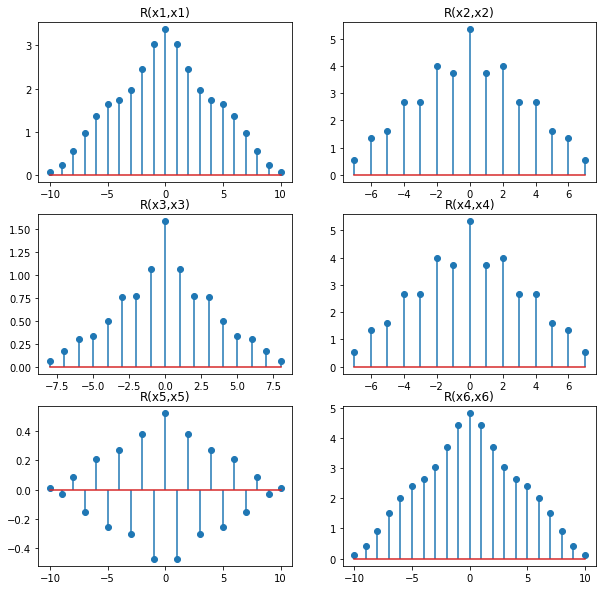

In [8]:
plt.figure(1,figsize=(10,10))
for i in range(6):
  plt.subplot(3,2,i+1)
  n,acf=autocorrelation(x[i],x[i])
  print(f"Autocorrelation of x{i+1} with a delay of 2 = ",acf[np.where(n==2)][0])
  print(f"Power of x{i+1} = ",acf[np.where(n==0)][0])
  plt.stem(n,acf,use_line_collection=True)
  plt.title(f"R(x{i+1},x{i+1})")
      

Cross-correlation of x1 and x2 with a delay of 2 =  2.6116797632273103
Cross-correlation of x1 and x3 with a delay of 2 =  0.8520486109599129
Cross-correlation of x1 and x4 with a delay of 2 =  2.6116797632273103
Cross-correlation of x1 and x5 with a delay of 2 =  -0.0642898200777566
Cross-correlation of x1 and x6 with a delay of 2 =  3.016846361185984
Cross-correlation of x2 and x3 with a delay of 2 =  1.0606601717798212
Cross-correlation of x2 and x4 with a delay of 2 =  4.0
Cross-correlation of x2 and x5 with a delay of 2 =  -0.32760915412331243
Cross-correlation of x2 and x6 with a delay of 2 =  2.552323404972144
Cross-correlation of x3 and x4 with a delay of 2 =  2.121320343559643
Cross-correlation of x3 and x5 with a delay of 2 =  0.15451937746431454
Cross-correlation of x3 and x6 with a delay of 2 =  1.8148635413446148
Cross-correlation of x4 and x5 with a delay of 2 =  -0.32760915412331243
Cross-correlation of x4 and x6 with a delay of 2 =  2.552323404972144
Cross-correlation o

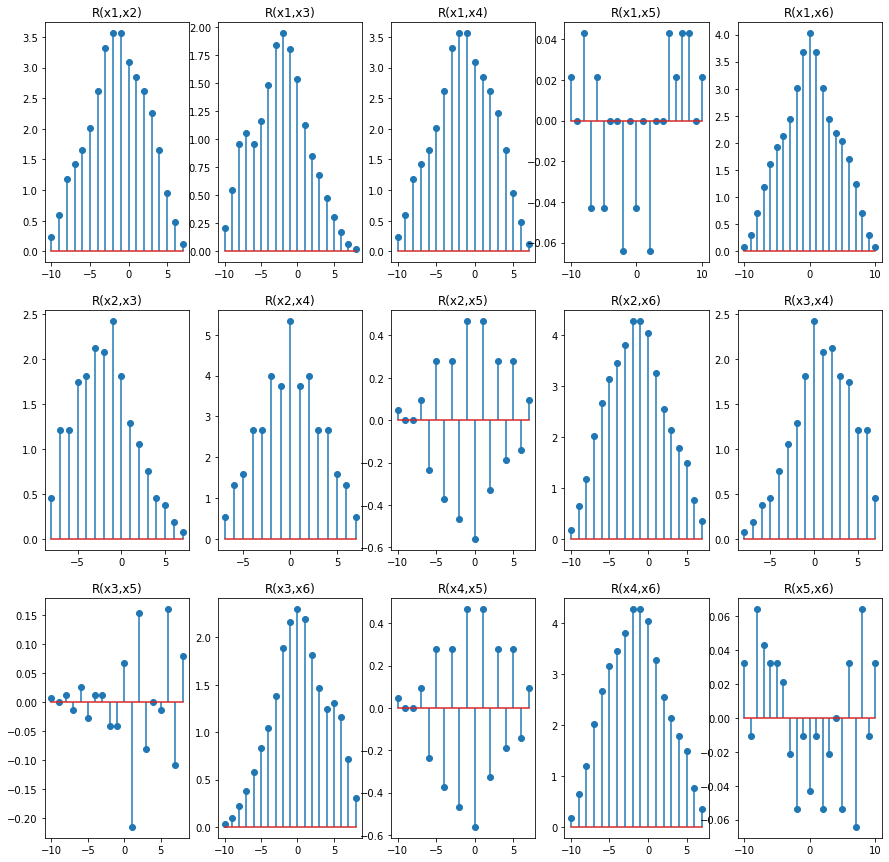

In [18]:
plt.figure(1,figsize=(15,15))
p=1
for i in range(6):
  for j in range(i,6):
    if i!=j:
      plt.subplot(3,5,p)
      n,acf=autocorrelation(x[i],x[j])
      print(f"Cross-correlation of x{i+1} and x{j+1} with a delay of 2 = ",acf[np.where(n==2)][0])
      plt.stem(n,acf,use_line_collection=True)
      plt.title(f"R(x{i+1},x{j+1})")
      p+=1

#**Noise**

Text(0.5, 1.0, 'Red noise')

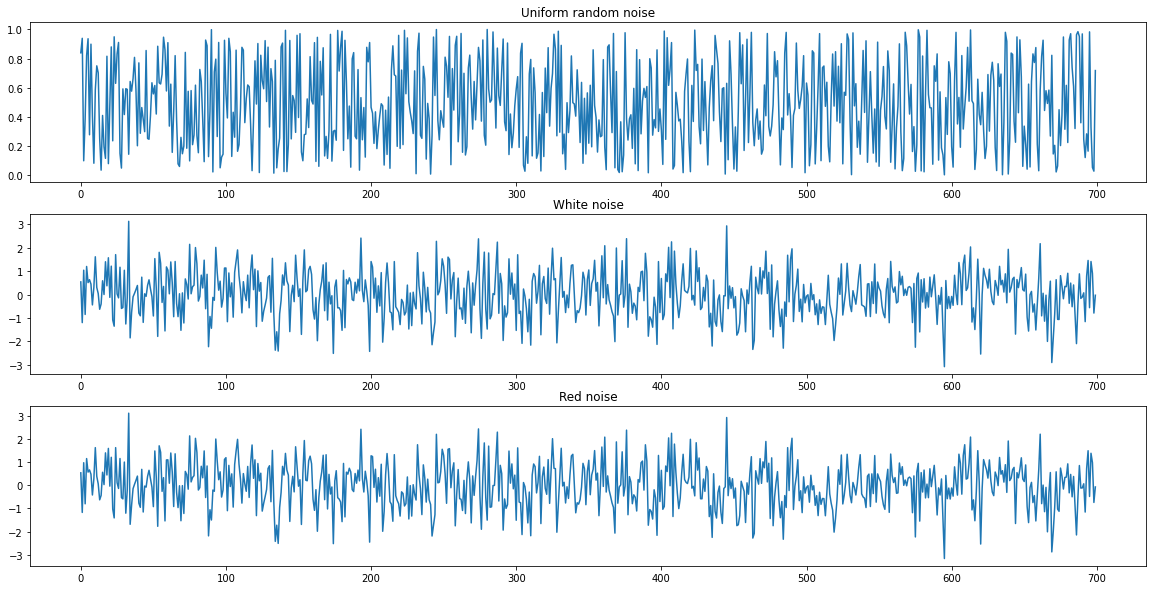

In [67]:
uniformnoise = np.random.uniform(0,1,size=700)
plt.figure(1,figsize=(20,10))
plt.subplot(3,1,1)
plt.plot(uniformnoise)
plt.title("Uniform random noise")
whitenoise = np.random.normal(0,1,size=700)
plt.subplot(3,1,2)
plt.plot(whitenoise)
plt.title("White noise")
rednoise = np.zeros(700)
rednoise[0] = whitenoise[0]
r=random.random()
for i in range(699):
    rednoise[i+1]  = r*rednoise[i]  + ((1 - pow(r,2))**0.5)*whitenoise[i+1]
plt.subplot(3,1,3)
plt.plot(rednoise)
plt.title("Red noise")

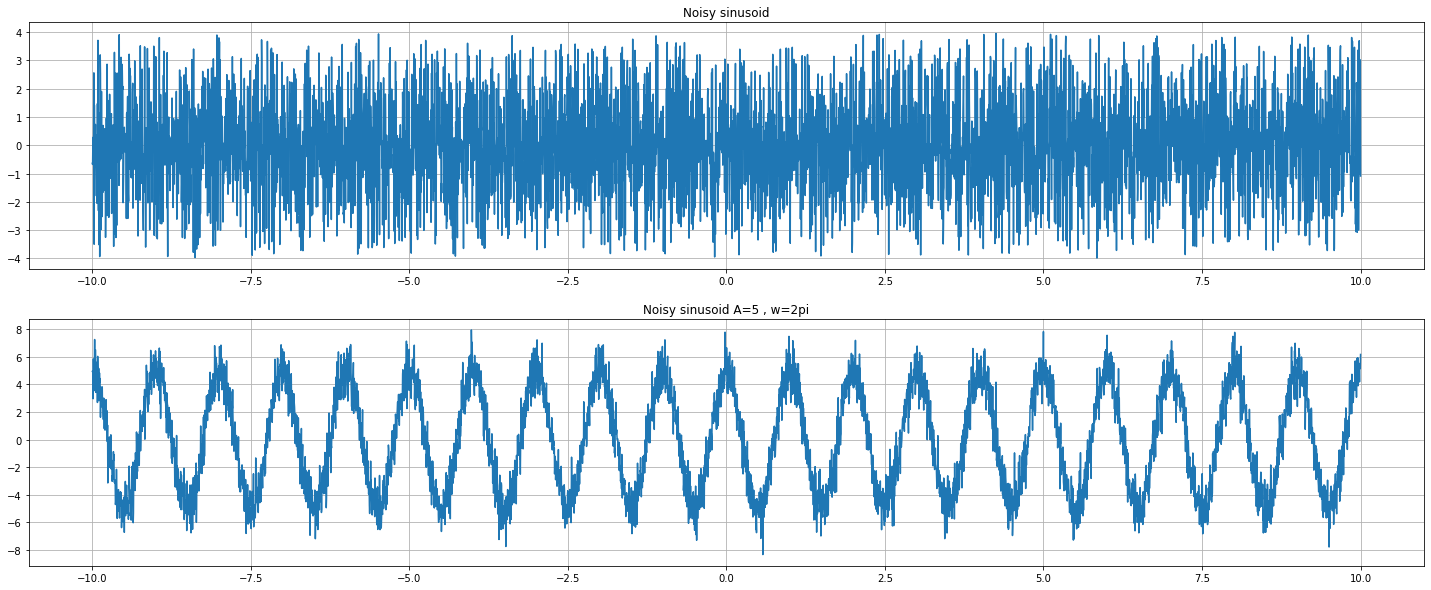

In [65]:
A = np.random.uniform(0, 4, size=5000)
phi = np.random.uniform(0, 2*np.pi, size=5000)
t = np.linspace(-10,10,5000)
plt.figure(1,figsize=(25,10))
plt.subplot(2,1,1)
x = A*np.cos(2*np.pi*t + phi)
plt.plot(t,x)
plt.title("Noisy sinusoid")
plt.grid(True)


y = 5*np.cos(2*np.pi*t) + np.random.normal(0, 1, size=5000)
plt.subplot(2,1,2)
plt.plot(t,y)
plt.title("Noisy sinusoid A=5 , w=2pi")
plt.grid(True)
